## Churn modeling

### Introduction

The term **churn** is used in marketing to refer to a customer leaving the company in favour of a competitor. Churning is a common concern of **Customer Relationship Management** (CRM). A key step in proactive churn management is to predict whether a customer is likely to churn, since an early detection of the potential churners helps to plan the retention campaigns.

In this example, I develop a churn model, based on a logistic regression equation, for a company called *Omicron Mobile*, which provides mobile phone services. The data set is a random sample from the customers database of the third quarter, whose accounts were still alive by September 30, and have been monitored during the fourth quarter. The sample size is 5,000, with a **churning rate** of 19.4%.

The variables included in the data set are: 

* `id`, a customer ID (the phone number).

* `aclentgh`, the number of days the account has been active at the beginning of the period monitored.

* `intplan`, a dummy for having an international plan.

* `dataplan`, a dummy for having a data plan.

* `datagb`, the gigabytes available according to the data plan.

* `ommin`, the total minutes call to any Omicron mobile phone number, voicemail or national landline.

* `omcall`, the total number of calls to any Omicron mobile phone number, voicemail or national landline.

* `otmin`, the total minutes call to other mobile networks.

* `otcall`, the total number of calls to other networks.

* `ngmin`, the total minutes call to nongeographic numbers. Nongeographic numbers, such as UK 0844 or 0871 numbers, are often helplines for organizations like banks, insurance companies, utilities and charities. 

* `ngcall`, the total number of calls to nongeographic numbers.

* `imin`, the total minutes in international calls.

* `icall`, the total international calls.

* `cuscall`, the number of calls to customer service.

* `churn`, a dummy for churning.

All the data are from the third quarter except the last variable. 

### Importing the data

The data come in a CSV file, which I import with the function `read.csv`, with two additional arguments: (a) with `row.names='id'`, the first column is taken out and used as the vector of row names, and (b) with `stringsAsFactors=FALSE`, the other column with string data (`datagb`) is imported as a **character vector**, not as a **factor**.

In [1]:
churn = read.csv('https://raw.githubusercontent.com/iese-bad/DataSci/master/Data/churn.csv',
    stringsAsFactors=FALSE, row.names='id')
str(churn)

'data.frame':	5000 obs. of  14 variables:
 $ aclength: int  77 105 121 115 133 95 50 157 35 96 ...
 $ intplan : int  0 0 0 0 0 0 1 0 0 0 ...
 $ dataplan: int  0 0 1 0 1 1 0 1 1 0 ...
 $ datagb  : chr  "0" "0" "1.5G" "0" ...
 $ ommin   : num  80.8 131.8 212.1 186.1 166.5 ...
 $ omcall  : int  70 66 57 64 61 85 96 73 56 99 ...
 $ otmin   : num  166 132 195 231 176 ...
 $ otcall  : int  67 105 140 125 74 98 73 71 77 99 ...
 $ ngmin   : num  18.6 5.1 14.9 26.5 36.1 11.1 34.5 15.3 21.6 12.4 ...
 $ ngcall  : int  6 6 14 16 11 2 10 8 7 2 ...
 $ imin    : num  9.5 6.7 28.6 9.9 5.3 0 18.4 11.3 0 5.2 ...
 $ icall   : int  4 2 8 4 2 0 7 3 0 2 ...
 $ cuscall : int  1 0 1 1 1 1 1 3 0 0 ...
 $ churn   : int  0 0 0 0 0 1 1 0 1 0 ...


In [2]:
print(row.names(churn)[1:10])

 [1] "409-8978" "444-7077" "401-9132" "409-2971" "431-5175" "375-5486"
 [7] "400-7151" "390-2169" "420-8569" "446-7327"


### Prediction with  a logistic regression model

I set the formula, including all the variables, although some of them may be redundant. I use a trick for getting it short. The dot on the right side of the formula stands for all the variables in the data set except the one at the left side.

In [3]:
fm = churn ~ .

Note that `datagb` is a **categorical variable**. When we include a categorical variable in the formula, either as a factor or as a character vector, R creates a set of dummies by itself (as many dummies as the number of categories minus 1). These dummies are not part of the data set, and cannot be used out of the model.

In R, **logistic regression** is a particular case of **generalized linear modeling**, performed with the function `glm`. This function has an extra argument, `family`, used for choosing among GLM methods. In the context of this course, this is not relevant, so I skip the details. The `summary` function works as for `lm`. 

In [4]:
mod = glm(formula=fm, data=churn, family="binomial") 
summary(mod)


Call:
glm(formula = fm, family = "binomial", data = churn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1194  -0.5904  -0.4306  -0.2832   2.8124  

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.2055915  0.3084099 -16.879  < 2e-16 ***
aclength     0.0004580  0.0010206   0.449  0.65363    
intplan      2.0718784  0.1342263  15.436  < 2e-16 ***
dataplan     0.1802750  0.1676287   1.075  0.28218    
datagb1.5G  -0.3700765  0.2059367  -1.797  0.07233 .  
datagb100M  -0.1880175  0.3678689  -0.511  0.60928    
datagb1G    -0.6830531  0.2298969  -2.971  0.00297 ** 
datagb250M  -0.4123199  0.2810901  -1.467  0.14241    
datagb2G    -0.2442181  0.3484156  -0.701  0.48334    
datagb500M          NA         NA      NA       NA    
ommin        0.0084588  0.0009783   8.646  < 2e-16 ***
omcall      -0.0036002  0.0027493  -1.310  0.19036    
otmin        0.0039567  0.0009969   3.969 7.22e-05 ***


Note that R has created the dummies associated to `datagb`, excluding the level which comes first in alphabetical order (`datagb = 0`). But one of the dummies (`datagb500M`) is dropped by R due to collinearity. Indeed, `datagb` takes value `0` when `dataplan` takes value `0`, so we have two superfluous dummies here. This is illustrated by the table below.

In [5]:
table(churn[, 'dataplan'], churn[, 'datagb'])

   
       0 1.5G 100M   1G 250M   2G 500M
  0 3449    0    0    0    0    0    0
  1    0  522   74  410  168   86  291

But this does not harm our model, so we leave it as it is.

### Predictive scores

The function `predict` is used as for the linear regression model, but, in order to obtain the **scores**, we have to include the argument `type='response'`.

In [6]:
score = predict(mod, newdata=churn, type='response')

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

*Note*. Warnings in R do not stop the process, but simply let know that something be wrong. Warnings are typically produced in logistic when making predictions. You can dismiss them.

The predictive score can be interpreted as the propensity to churn. Reading it so, it would be natural to set the **cutoff** for classification at 0.5. But taking a look at the distribution of the scores can suggest otherwise. In particular, it is interesting to examine the distribution separately in the churners and the non-churners. I start with the churners (Figure 1). 

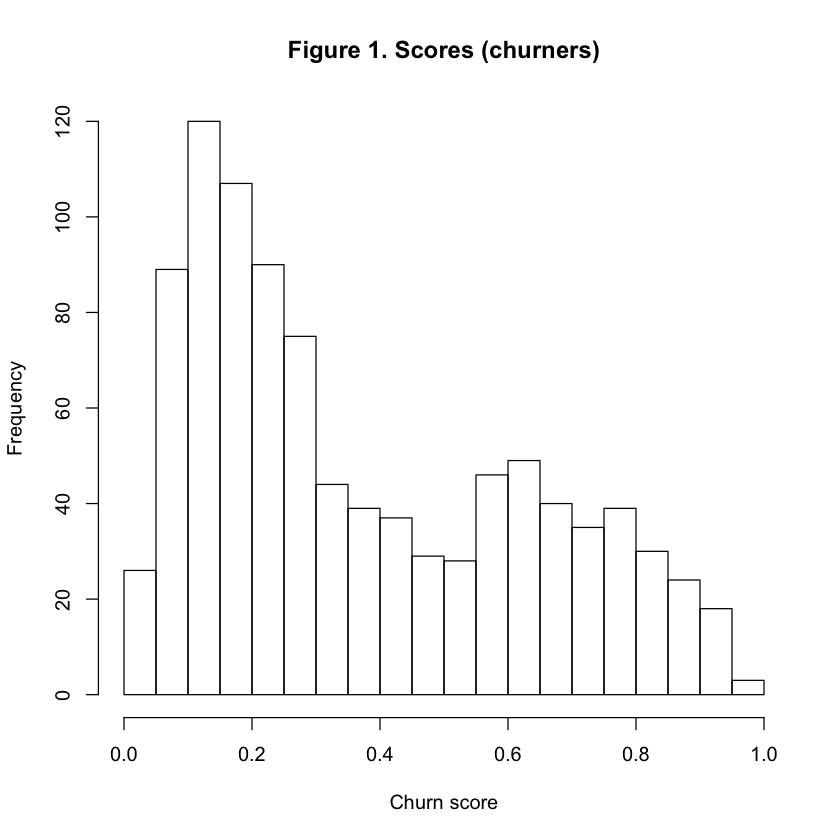

In [7]:
hist(score[churn[, 'churn']==1], breaks=20,
     main='Figure 1. Scores (churners)', xlab='Churn score')

Note that I have controlled the **number of bins** with the argument `breaks=20`. For the unit interval, this creates a partition into intervals of length 0.05, which works fine here. I repeat the exercise for the non-churners (Figure 2).

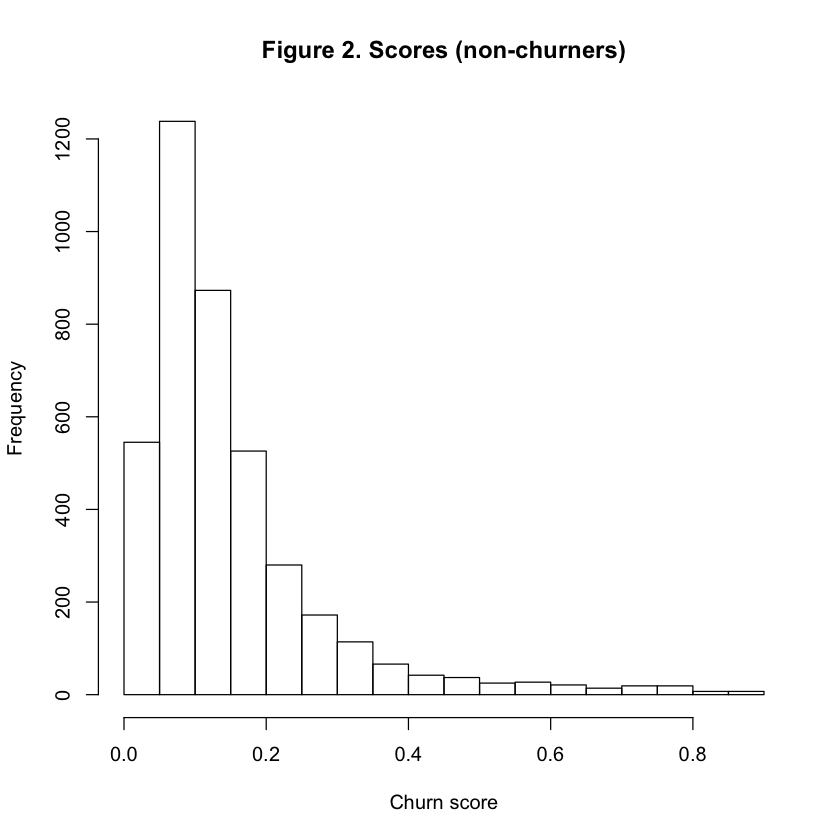

In [8]:
hist(score[churn[, 'churn']==0], breaks=20,
     main='Figure 2. Scores (non-churners)', xlab='Churn score')

### Confusion matrix

The **confusion matrix** is a 2-way table which can be obtained with the function `table`. Note that the vector first specified comes in the rows. I start setting the cutoff at 0.5. Taking a look at the above histograms could tell us in advance what we are going to find. In Figure 1, classifying as churners only those customers with score higher than 0.5 will leave out more than one half of the actual churners, which, from a business perspective, looks like a poor job. In compensation, we see in Figure 2 than the vast majority of the non-churners will be classified the right way. This is, indeed, what the confusion matrix shows.

In [9]:
conf1 = table(score > 0.5, churn[, 'churn'] == 1)
print(conf1)

       
        FALSE TRUE
  FALSE  3893  656
  TRUE    139  312


The **true positive (TP) rate** and the **false positive (FP) rate** allow us to be more specific. Here, the FP rate is pretty low, but the TP rate shows that a cutoff so high does not capture enough potential churners. 

In [10]:
tp1 = conf1["TRUE", "TRUE"]/sum(conf1[, "TRUE"])
print(round(tp1, 3))

[1] 0.322


In [11]:
fp1 = conf1["TRUE", "FALSE"]/sum(conf1[, "FALSE"])
print(round(fp1, 3))

[1] 0.034


I set now the cutoff at 0.2. Again, we can guess what will happen from the histograms, but the TP and FP rates allow us to be more specific. 

In [12]:
conf2 = table(score > 0.2, churn[, 'churn'] == 1)
print(conf2)

       
        FALSE TRUE
  FALSE  3182  342
  TRUE    850  626


In [13]:
tp2 = conf2['TRUE', 'TRUE']/sum(conf2[, 'TRUE'])
print(round(tp2, 3)) 

[1] 0.647


In [14]:
fp2 = conf2['TRUE', 'FALSE']/sum(conf2[, 'FALSE'])
print(round(fp2, 3))

[1] 0.211


Now the results look more acceptable. Nevertheless, in a business application, a **cost/benefit analysis** would be the right way to decide how useful this model could be. I leave this for the homework.

### Continuation

Assume that the Omicron management plans to offer a 20% discount to the customers that the model classifies as potential churners, and that this offer is going to have a 100% success, so the company will retain all the churners. 

* Evaluate the benefit produced by this **retention policy** with the two models already developed. 

* Define an `R` function that gives the benefit in terms of the cutoff and find an **optimal cutoff** for this retention policy.